In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.tests.test_formatters import test_precision
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from tensorflow.keras.metrics import Precision, Recall

import datetime
import json
from os import write
import re
import subprocess
import urllib.parse
from markupsafe import escape
from flask import (Flask, Response, make_response, render_template,
                   request)
from werkzeug.routing import BaseConverter
import numpy as np
from keras.models import load_model

from keras import backend as K
import urllib.parse
import pprint
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *

2024-10-28 19:53:49.969596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730120029.982747   80691 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730120029.987684   80691 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 19:53:50.001621: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv('Dataset/cisc_database/test_data.csv')
df.head()

,URL,Target
0,http://localhost:8080/tienda1/imagenes/3.gif,0
1,http://localhost:8080/tienda1/publico/autentic...,0
2,http://localhost:8080/tienda1/publico/anadir.j...,1
3,http://localhost:8080/tienda1/publico/carrito.jsp,0
4,http://localhost:8080/tienda1/imagenes/nuestra...,0


In [4]:
# unique_labels = df['Target'].unique()
# print (unique_labels)
# # ??????

In [5]:
evaluation = pd.read_csv('Dataset/cisc_database/test_data.csv')
evaluation.head()

,URL,Target
0,http://localhost:8080/tienda1/imagenes/3.gif,0
1,http://localhost:8080/tienda1/publico/autentic...,0
2,http://localhost:8080/tienda1/publico/anadir.j...,1
3,http://localhost:8080/tienda1/publico/carrito.jsp,0
4,http://localhost:8080/tienda1/imagenes/nuestra...,0


In [6]:
model = load_model('saved_model/model.h5')

I0000 00:00:1730120032.262350   80691 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [7]:
with open("waf/denylist.txt") as f:
  denylist = [s.strip() for s in f.readlines()]

In [8]:
# 定義済みのシグネチャを参照したパターンマッチング
def signature(url):  
  path = url.strip()[22:]
  for val in denylist:
    m = re.match(val, path, re.IGNORECASE)
    if m != None :
      return 1
  return 0

In [9]:
import urllib.parse
def url_decode(encoded_URL):
  return urllib.parse.unquote(encoded_URL)

In [10]:
def load_data(urls, max_length=1000):
    urls = [s.lower() for s in urls]
    url_list = []
    for url in urls:
        # url decode
        decoded_url = url_decode(url)
        # unicode encode
        encoded_url = [ord(x) for x in str(decoded_url).strip()]
        encoded_url = encoded_url[:max_length]
        url_len = len(encoded_url)
        if url_len < max_length:
            # zero padding
            encoded_url += ([0] * (max_length - url_len))
        url_list.append((encoded_url))
    # convert to numpy array
    url_list = np.array(url_list)
    return url_list

In [11]:
def create_label(labels):
  class_list = [x for x in labels]
  classes = np.array(class_list)
  return classes

In [12]:
X_test, y_test = df['URL'], df['Target']

In [13]:
test_data = load_data(X_test)

In [14]:
print(test_data)

[[104 116 116 ...   0   0   0]
 [104 116 116 ...   0   0   0]
 [104 116 116 ...   0   0   0]
 ...
 [104 116 116 ...   0   0   0]
 [104 116 116 ...   0   0   0]
 [104 116 116 ...   0   0   0]]


In [15]:
test_classes = create_label(y_test)

In [16]:
print(test_classes)

[0 0 1 ... 0 0 1]


# Evaluate

In [17]:
test_results = model.evaluate(test_data, test_classes, verbose=2)

test_loss = test_results[0]
test_accuracy = test_results[1]
test_precision = test_results[2]
test_recall = test_results[3]
print("test_loss: ", test_loss)
print("test_accuracy: ", test_accuracy)
print("test_precision: ", test_precision)
print("test_recall: ", test_recall)
#print("binary_accuracy: ", binary_accuracy)
#print("categorical_accuracy:", categorical_accuracy)

I0000 00:00:1730120035.724537   80763 service.cc:148] XLA service 0x7ffe44004560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730120035.724586   80763 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-10-28 19:53:55.746095: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730120035.786560   80763 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1730120036.300165   80763 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 - 2s - 12ms/step - accuracy: 0.8644 - binary_accuracy: 0.8644 - loss: 0.2255 - precision: 0.7525 - recall: 0.9936
test_loss:  0.22552479803562164
test_accuracy:  0.8644179105758667
test_precision:  0.7525144815444946
test_recall:  0.9935613870620728


In [18]:
def matching(urls):
  y_match = []
  for url in urls:
    url = url.strip()[22:]
    y_match.append(signature(url))
  y_match = pd.Series(y_match)
  return y_match

In [19]:
urls = evaluation['URL']
urls

0            http://localhost:8080/tienda1/imagenes/3.gif
1       http://localhost:8080/tienda1/publico/autentic...
2       http://localhost:8080/tienda1/publico/anadir.j...
3       http://localhost:8080/tienda1/publico/carrito.jsp
4       http://localhost:8080/tienda1/imagenes/nuestra...
                              ...                        
6102     http://localhost:8080/tienda1/publico/entrar.jsp
6103    http://localhost:8080/tienda1/miembros/imagene...
6104    http://localhost:8080/tienda1/miembros/imagene...
6105    http://localhost:8080/tienda1/miembros/imagene...
6106    http://localhost:8080/tienda1/publico/registro...
Name: URL, Length: 6107, dtype: object

In [20]:
y_match = matching(urls)
y_match

0       0
1       0
2       0
3       0
4       0
       ..
6102    0
6103    0
6104    0
6105    0
6106    0
Length: 6107, dtype: int64

In [21]:
# denylistで防げた数
sum(y_match)

20

In [22]:
y_true = evaluation['Target']
y_true

0       0
1       0
2       1
3       0
4       0
       ..
6102    0
6103    0
6104    0
6105    0
6106    1
Name: Target, Length: 6107, dtype: int64

In [23]:
evaluation['y_match'] = y_match
evaluation.head()

,URL,Target,y_match
0,http://localhost:8080/tienda1/imagenes/3.gif,0,0
1,http://localhost:8080/tienda1/publico/autentic...,0,0
2,http://localhost:8080/tienda1/publico/anadir.j...,1,0
3,http://localhost:8080/tienda1/publico/carrito.jsp,0,0
4,http://localhost:8080/tienda1/imagenes/nuestra...,0,0


In [24]:
y_pred = model.predict(test_data)

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [25]:
evaluation['y_pred'] = y_pred
evaluation.head()

,URL,Target,y_match,y_pred
0,http://localhost:8080/tienda1/imagenes/3.gif,0,0,0.002446
1,http://localhost:8080/tienda1/publico/autentic...,0,0,0.681364
2,http://localhost:8080/tienda1/publico/anadir.j...,1,0,0.997617
3,http://localhost:8080/tienda1/publico/carrito.jsp,0,0,0.002916
4,http://localhost:8080/tienda1/imagenes/nuestra...,0,0,0.003456


In [26]:
evaluation['y_pred'] = evaluation['y_pred'].apply(lambda x:1 if x >= 0.5 else 0)
evaluation.head()

,URL,Target,y_match,y_pred
0,http://localhost:8080/tienda1/imagenes/3.gif,0,0,0
1,http://localhost:8080/tienda1/publico/autentic...,0,0,1
2,http://localhost:8080/tienda1/publico/anadir.j...,1,0,1
3,http://localhost:8080/tienda1/publico/carrito.jsp,0,0,0
4,http://localhost:8080/tienda1/imagenes/nuestra...,0,0,0


In [27]:
print(sum(evaluation['Target']))
print(sum(evaluation['y_pred']))

2485
3281


In [28]:
evaluation['WAffle'] = (evaluation['y_pred'] | evaluation['y_match'])
evaluation.head()

,URL,Target,y_match,y_pred,WAffle
0,http://localhost:8080/tienda1/imagenes/3.gif,0,0,0,0
1,http://localhost:8080/tienda1/publico/autentic...,0,0,1,1
2,http://localhost:8080/tienda1/publico/anadir.j...,1,0,1,1
3,http://localhost:8080/tienda1/publico/carrito.jsp,0,0,0,0
4,http://localhost:8080/tienda1/imagenes/nuestra...,0,0,0,0


In [29]:
print(accuracy_score(evaluation['Target'], evaluation['WAffle']))
print(precision_score(evaluation['Target'], evaluation['WAffle']))
print(recall_score(evaluation['Target'], evaluation['WAffle']))

0.8644178811200262
0.7525144772935081
0.9935613682092556


In [30]:
print(classification_report(evaluation['Target'], evaluation['WAffle']))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      3622
           1       0.75      0.99      0.86      2485

    accuracy                           0.86      6107
   macro avg       0.87      0.88      0.86      6107
weighted avg       0.90      0.86      0.87      6107



In [31]:
d = classification_report(evaluation['Target'], evaluation['WAffle'], output_dict=True)
pprint.pprint(d)

{'0': {'f1-score': 0.8715880893300249,
       'precision': 0.9943382873319179,
       'recall': 0.7758144671452236,
       'support': 3622.0},
 '1': {'f1-score': 0.8563995837669095,
       'precision': 0.7525144772935081,
       'recall': 0.9935613682092556,
       'support': 2485.0},
 'accuracy': 0.8644178811200262,
 'macro avg': {'f1-score': 0.8639938365484672,
               'precision': 0.873426382312713,
               'recall': 0.8846879176772395,
               'support': 6107.0},
 'weighted avg': {'f1-score': 0.8654077329644867,
                  'precision': 0.8959377358425697,
                  'recall': 0.8644178811200262,
                  'support': 6107.0}}


In [32]:
cm = confusion_matrix(evaluation['Target'], evaluation['WAffle'])
print(cm)

[[2810  812]
 [  16 2469]]


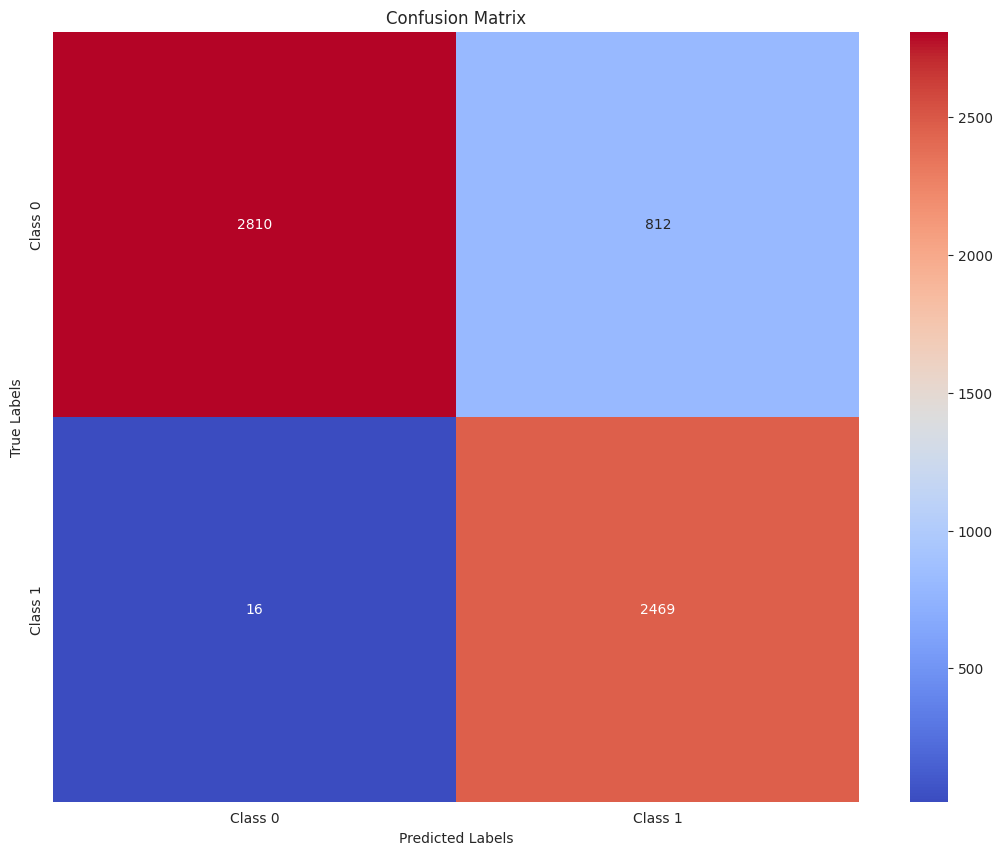

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
evaluation.to_csv('./Dataset/cisc_database/evaluation.csv')